# **Computational Semantic & Narrative Analysis of Shri Ramcharitmanas in a Low-Resource NLP Setting**

## **Questions To Lock In**

### **1.Semantic Structure:** How does the meaning structure change across different Kandas?

### **2.Subword Modeling:** Does subword modeling (FastText) handle the rich morphology of the text better than whole-word modeling (Word2Vec)?

### **3.Narrative Transitions:** Which transitions between sections show the strongest shifts in meaning?

## **Phase 1: Data Preprocessing**

In [ ]:
import json
import regex as re

def clean_data(input_file,output_file):
    with open(input_file,'r',encoding = 'utf-8') as f:
        data = json.load(f)

    with open(output_file,'w',encoding = 'utf-8') as out:
        for item in data:
            text = item.get('content','').strip()
            if text:
                cleaned = re.sub(r"।।.*?।।", " ", text)
                text = cleaned.replace("।"," ").replace("\n"," ")
                out.write(text+"\n")

In [ ]:
clean_data("Bal_kand_data.json","data/Bal_kand_data.txt")
clean_data("Ayodhya_kand_data.json","data/Ayodhya_kand_data.txt")
clean_data("Aranya_kand_data.json","data/Aranya_kand_data.txt")
clean_data("Kishkindha_kand_data.json","data/Kishkindha_kand_data.txt")
clean_data("Sundar_kand_data.json","data/Sundar_kand_data.txt")
clean_data("Lanka_kand_data.json","data/Lanka_kand_data.txt")
clean_data("Uttara_kand_data.json","data/Uttara_kand_data.txt")

In [ ]:
import unicodedata

def normalize(text):
    return unicodedata.normalize('NFC',text)

### **Unicode normalization**

In [1]:
files = ['data/full_text.text','data/Bal_kand_data.text','data/Ayodhya_kand_data.text','data/Aranya_kand_data.text','data/Kishkindha_kand_data.text','data/Sundar_kand_data.text','data/Lanka_kand_data.text','data/Uttara_kand_data.text']
text_files = ['full_text','Bal_kand_data','Ayodhya_kand_data','Aranya_kand_data','Kishkindha_kand_data','Sundar_kand_data','Lanka_kand_data','Uttara_kand_data']
for i in range(len(files)):
    with open(files[i],'r',encoding = 'utf-8') as f:
        text_files[i] = f.read()

In [2]:
file_names = ['full_text','Bal_kand_data','Ayodhya_kand_data','Aranya_kand_data','Kishkindha_kand_data','Sundar_kand_data','Lanka_kand_data','Uttara_kand_data']

### **Removing Punctuation**

In [ ]:
import regex as re
PUNCT_RE = re.compile(r"[।॥,;:!?]")

def remove_punct(text):
    return PUNCT_RE.sub("", text)


### **Whitespace Normalization**

In [ ]:
def normalize_whitespaces(text):
    return "\n".join(" ".join(line.split()) for line in text.splitlines())

Whitespace normalization is applied per verse to preserve narrative boundaries.

In [ ]:
cleaned_text_files = ['data/full_text.text','data/Bal_kand_data.text','data/Ayodhya_kand_data.text','data/Aranya_kand_data.text','data/Kishkindha_kand_data.text','data/Sundar_kand_data.text','data/Lanka_kand_data.text','data/Uttara_kand_data.text']
for i in range(len(files)):
    with open(cleaned_text_files[i],'w',encoding= 'utf-8') as f:
        data = remove_punct(text_files[i])
        data = normalize_whitespaces(data)
        cleaned_text_files[i] = f.write(data)
        text_files[i] = data

## **Phase 2: Understanding Corpus Statistics & Vocabulary Quality**

### **Total Number Of Verses**

In [ ]:
def total_verses(text):
    print(len(text.split("\n")))

for i in range(len(files)):
    print(f"Total Verses in {file_names[i]}: ",end="")
    total_verses(text_files[i])

Total Verses in full_text: 2247
Total Verses in Bal_kand_data: 760
Total Verses in Ayodhya_kand_data: 664
Total Verses in Aranya_kand_data: 98
Total Verses in Kishkindha_kand_data: 61
Total Verses in Sundar_kand_data: 121
Total Verses in Lanka_kand_data: 273
Total Verses in Uttara_kand_data: 270


### **Total Number Of Tokens(Words)**

In [ ]:
for i in range(len(files)):
    total_word_count = 0
    print(f"Total Word Count in {file_names[i]}: ",end="")
    for sentences in text_files[i].split("\n"):
        for word in sentences.split(" "):
            total_word_count += 1
    print(total_word_count)

Total Word Count in full_text: 115449
Total Word Count in Bal_kand_data: 36858
Total Word Count in Ayodhya_kand_data: 31140
Total Word Count in Aranya_kand_data: 6615
Total Word Count in Kishkindha_kand_data: 3478
Total Word Count in Sundar_kand_data: 6277
Total Word Count in Lanka_kand_data: 15116
Total Word Count in Uttara_kand_data: 15965


### **Vocabulary Size**

In [ ]:
vocabulary_set = []
for i in range(len(files)):
    total_words = []
    print(f"Total Vocabulary Size in {file_names[i]}: ",end="")
    for sentences in text_files[i].split("\n"):
        for word in sentences.split(" "):
            total_words.append(word)
    print(len(set(total_words)))

Total Vocabulary Size in full_text: 15238
Total Vocabulary Size in Bal_kand_data: 7938
Total Vocabulary Size in Ayodhya_kand_data: 6649
Total Vocabulary Size in Aranya_kand_data: 2627
Total Vocabulary Size in Kishkindha_kand_data: 1622
Total Vocabulary Size in Sundar_kand_data: 2386
Total Vocabulary Size in Lanka_kand_data: 4336
Total Vocabulary Size in Uttara_kand_data: 4425


### **Hapax Legomena**

In [ ]:
from collections import Counter
vocabulary_set = []
for i in range(len(files)):
    total_words = []
    print(f"Total Hapax Legomena Count in {file_names[i]}: ",end="")
    for sentences in text_files[i].split("\n"):
        for word in sentences.split(" "):
            total_words.append(word)

    word_counts = Counter(total_words)
    hapax = [w for w, c in word_counts.items() if c == 1]
    print(len(hapax))

Total Hapax Legomena Count in full_text: 7688
Total Hapax Legomena Count in Bal_kand_data: 4241
Total Hapax Legomena Count in Ayodhya_kand_data: 3569
Total Hapax Legomena Count in Aranya_kand_data: 1651
Total Hapax Legomena Count in Kishkindha_kand_data: 1067
Total Hapax Legomena Count in Sundar_kand_data: 1442
Total Hapax Legomena Count in Lanka_kand_data: 2424
Total Hapax Legomena Count in Uttara_kand_data: 2549


### **Percentage Of Rare tokens (freq ≤ 2)**

In [ ]:
for i in range(len(files)):
    total_words = []
    print(f"Total % Of rare words in {file_names[i]}: ",end="")
    for sentences in text_files[i].split("\n"):
        for word in sentences.split(" "):
            total_words.append(word)

    word_counts = Counter(total_words)
    hapax = [w for w, c in word_counts.items() if c == 1 or c == 2]
    print((len(hapax)/len(total_words))*100)

Total % Of rare words in full_text: 8.533638229867734
Total % Of rare words in Bal_kand_data: 14.85701882901948
Total % Of rare words in Ayodhya_kand_data: 14.64033397559409
Total % Of rare words in Aranya_kand_data: 30.990173847316704
Total % Of rare words in Kishkindha_kand_data: 37.5215641173088
Total % Of rare words in Sundar_kand_data: 29.074398598056394
Total % Of rare words in Lanka_kand_data: 20.680074093675575
Total % Of rare words in Uttara_kand_data: 20.112746633260254


### **Top 30 Most Frequent Words**

In [ ]:
for i in range(len(files)):
    total_words = []
    print(f"Top 30 words in {file_names[i]}: ",end="")
    for sentences in text_files[i].split("\n"):
        for word in sentences.split(" "):
            total_words.append(word)

    word_counts = Counter(total_words)
    print(word_counts.most_common(30))

Top 30 words in full_text: [('न', 1501), ('राम', 1145), ('सब', 1132), ('प्रभु', 670), ('मन', 667), ('अति', 590), ('कर', 550), ('सुनि', 524), ('सकल', 516), ('बिधि', 489), ('बचन', 482), ('करि', 479), ('सो', 478), ('निज', 478), ('पुनि', 473), ('मुनि', 464), ('नहिं', 413), ('मोहि', 408), ('तब', 393), ('देखि', 378), ('अस', 350), ('पद', 348), ('कहि', 335), ('उर', 324), ('के', 324), ('तुम्ह', 314), ('मैं', 307), ('जो', 292), ('एक', 292), ('भरत', 288)]
Top 30 words in Bal_kand_data: [('न', 464), ('सब', 399), ('राम', 259), ('सकल', 216), ('मन', 215), ('अति', 201), ('निज', 188), ('मुनि', 184), ('बिधि', 163), ('कर', 157), ('सुनि', 153), ('पुनि', 150), ('प्रभु', 148), ('सो', 147), ('करि', 130), ('देखि', 120), ('के', 119), ('नहिं', 117), ('बचन', 115), ('कहि', 113), ('तब', 112), ('पद', 111), ('जाइ', 111), ('बर', 108), ('जो', 107), ('उर', 105), ('अस', 104), ('सुर', 104), ('गुन', 101), ('जनु', 95)]
Top 30 words in Ayodhya_kand_data: [('न', 454), ('राम', 416), ('सब', 331), ('भरत', 245), ('सुनि', 199), (

## **Vocabulary Quality**

In [ ]:
THRESHOLD = 15

for i in range(len(files)):
    print(f"For {file_names[i]}:")

    total_words = []

    for line in text_files[i].split("\n"):
        total_words.extend(line.split())

    total_tokens = len(total_words)

    token_lengths = [len(t) for t in total_words]
    avg_token_length = sum(token_lengths) / total_tokens

    long_token_count = sum(1 for t in total_words if len(t) >= THRESHOLD)
    percentage_long_tokens = (long_token_count / total_tokens) * 100

    print("number_of_sanskrit_heavy_compounds:", long_token_count)
    print("average_token_length:", avg_token_length)
    print("percentage_of_token_ratio:", percentage_long_tokens)
    print()


For full_text:
number_of_sanskrit_heavy_compounds: 67
average_token_length: 4.0388743081360605
percentage_of_token_ratio: 0.058034283536453325

For Bal_kand_data:
number_of_sanskrit_heavy_compounds: 14
average_token_length: 4.075587389440556
percentage_of_token_ratio: 0.03798361278419882

For Ayodhya_kand_data:
number_of_sanskrit_heavy_compounds: 4
average_token_length: 4.001605651894669
percentage_of_token_ratio: 0.012845215157353885

For Aranya_kand_data:
number_of_sanskrit_heavy_compounds: 11
average_token_length: 4.00907029478458
percentage_of_token_ratio: 0.16628873771730915

For Kishkindha_kand_data:
number_of_sanskrit_heavy_compounds: 9
average_token_length: 3.982461184588844
percentage_of_token_ratio: 0.2587694077055779

For Sundar_kand_data:
number_of_sanskrit_heavy_compounds: 7
average_token_length: 4.019754659869364
percentage_of_token_ratio: 0.11151824119802455

For Lanka_kand_data:
number_of_sanskrit_heavy_compounds: 7
average_token_length: 4.027851283408309
percentage_of_

"**If a word exceeds 15 characters, we classify it as a complex Sanskrit-heavy compound.**"

1. "Bookend" Complexity (Bal & Uttara Kands)
The first section (Bal_kand) and the last section (Uttara_kand) appear to be the most linguistically complex and rich in words.

- Highest Number Of Sanskrit Heavy Compounds: They contain the highest number of Sanskrit-heavy compounds (14 and 15 respectively), significantly higher than the middle kand's.
- Longest Tokens: They also possess the highest average token lengths (approx. 4.07), suggesting the use of longer, possibly more descriptive or philosophical words.
- **Insight**: This pattern often occurs in epics where the introduction (setting the stage/lineage) and the conclusion (philosophical summary/aftermath) are written in a more elevated or formal style compared to the central narrative.

2. Narrative Simplicity in Ayodhya Kand
Ayodhya_kand stands out as having the simplest linguistic structure among the sections.

- It has the lowest number of Sanskrit-heavy compounds (only 4).
- It has the lowest percentage token ratio (approx. 1.28%).
- **Insight**: This part of the story focuses on feelings and conversations—like Rama leaving and his father being sad. Because this kanda uses simple words here instead of long, fancy ones, the story moves faster and the emotions hit you harder.

3. High Lexical Density in Nature-Centric Sections
Kishkindha_kand and Aranya_kand show a distinct anomaly regarding the percentage_of_token_ratio.

- Kishkindha_kand has the highest ratio (25.88%),followed by Aranya_kand (16.63%).
- However, Kishkindha has the shortest average token length (3.98).
- **Insight**: These sections deal heavily with nature, forests, and the Vanara (monkey) kingdom. The high ratio combined with shorter words suggests a diverse but concise vocabulary. The text may be using a wide variety of specific names for flora, fauna, and geography, increasing the uniqueness of the vocabulary (token ratio) without necessarily using long, complex compound words.

4. Consistency in Token Length
Despite the variations in compound usage, the Average Token Length remains remarkably consistent across the entire text, hovering tightly around 4.0.

- The range is narrow (3.98 to 4.07).
- **Insight**: This indicates a consistent rhythmic structure or meter throughout the full text, which is characteristic of poetic compositions like the Ramayana. Even when the vocabulary becomes more specific or complex, the fundamental word size remains stable to maintain the meter.


## **Phase 3: Units of Analysis**

In this phase, we study meaning at two levels.

**1. Word-level**

- We analyze **individual words**
- This level is used to compare **Word2Vec** and **FastText**

- It helps us understand:
- Word meaning
- Word structure and morphology
---
**2. Verse-level**

- Each **verse (chaupai or doha)** is treated as **one complete meaning unit**
- We create one vector for each verse

- These verse representations are used to study:
- Story flow
- Meaning across different kandas
---
**Why we do not use sentences or paragraphs**
- The text is **poetic**, not prose
- Meaning is naturally complete at the **verse level**
- Using sentences or paragraphs would break the original meaning
---
**Verse Embedding Strategy**

- To represent a verse, we average **the vectors of all words in that verse.**
**If a verse has `n` words, its vector is calculated as:**

`v_verse = (1/n) × sum of all word vectors`

This method is chosen because:

- It is **easy to understand**
- It works well with **small datasets**
- It allows **fair comparison** between different word embedding models
---
**Constraints and Assumptions**

- Only words that exist in the model vocabulary are used
- **Word2Vec**
  - Unknown words are ignored
- **FastText**
  - Unknown words are constructed using subword information
- Verse boundaries are always preserved
- Short verses are not removed to maintain story continuity

In [ ]:
verse_lengths = [len(line.split(" ")) for line in text_files[0].split("\n")]

print("Min verse length:", min(verse_lengths))
print("Max verse length:", max(verse_lengths))
print("Average verse length:", sum(verse_lengths) / len(verse_lengths))

Min verse length: 11
Max verse length: 367
Average verse length: 51.37917222963952


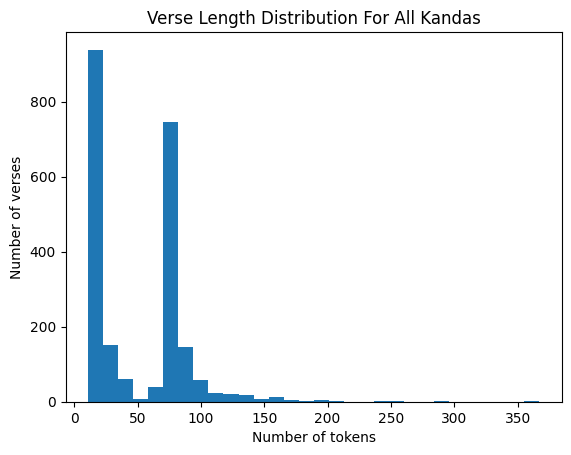

In [ ]:
import matplotlib.pyplot as plt

plt.hist(verse_lengths, bins=30)
plt.title("Verse Length Distribution For All Kandas")
plt.xlabel("Number of tokens")
plt.ylabel("Number of verses")
plt.show()


### **Cluster 1 (left peak)**

- Shorter verses (≈ 10–30 tokens)

- Typical dohas / chaupais

### **Cluster 2 (right peak)**

- Medium verses (≈ 60–100 tokens)

- Extended poetic or descriptive passages

- Long tail (100+ tokens)

### **Rare but very long verses**

Likely:

- Sanskrit-heavy sections

- Commentary-style verses

- Multi-line verses preserved as one unit

## **Kand-Level Representation**

Each kanda is represented as the mean of its verse embeddings.
This allows analysis of semantic progression across narrative phases
without introducing additional modeling assumptions.


Verse Length Distribution For Bal_kand_data
Min verse length: 11
Max verse length: 157
Average verse length: 48.497368421052634


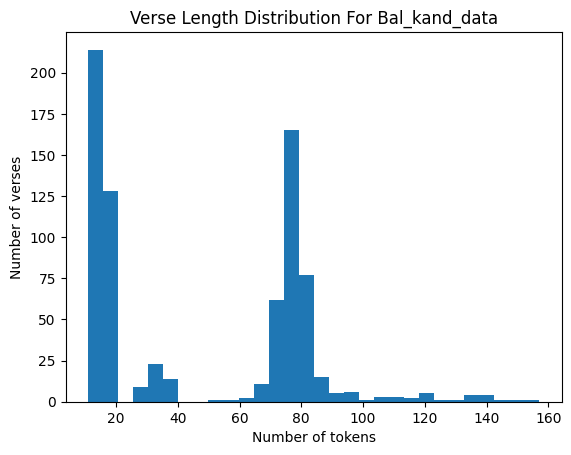

Verse Length Distribution For Ayodhya_kand_data
Min verse length: 12
Max verse length: 91
Average verse length: 46.897590361445786


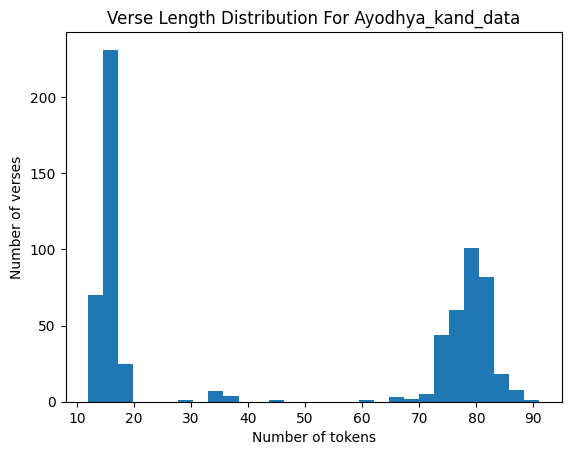

Verse Length Distribution For Aranya_kand_data
Min verse length: 14
Max verse length: 257
Average verse length: 67.5


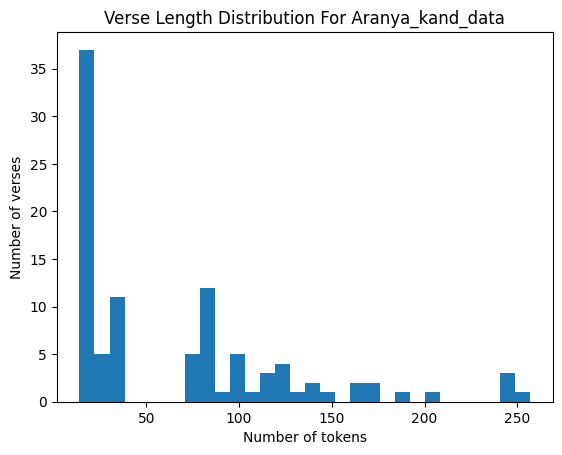

Verse Length Distribution For Kishkindha_kand_data
Min verse length: 13
Max verse length: 288
Average verse length: 57.01639344262295


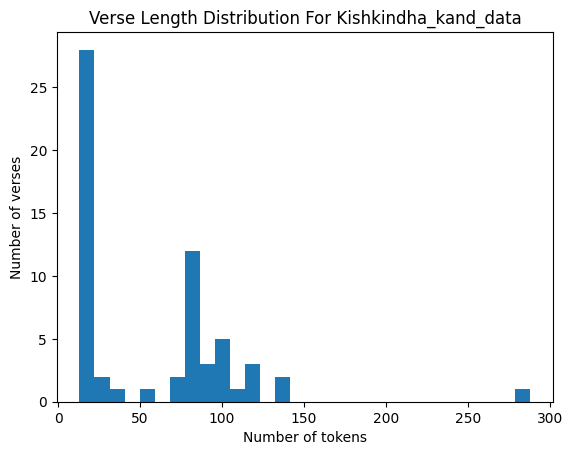

Verse Length Distribution For Sundar_kand_data
Min verse length: 12
Max verse length: 123
Average verse length: 51.87603305785124


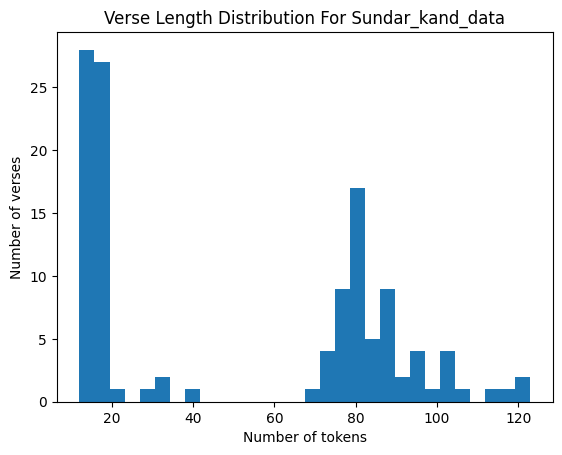

Verse Length Distribution For Lanka_kand_data
Min verse length: 12
Max verse length: 206
Average verse length: 55.36996336996337


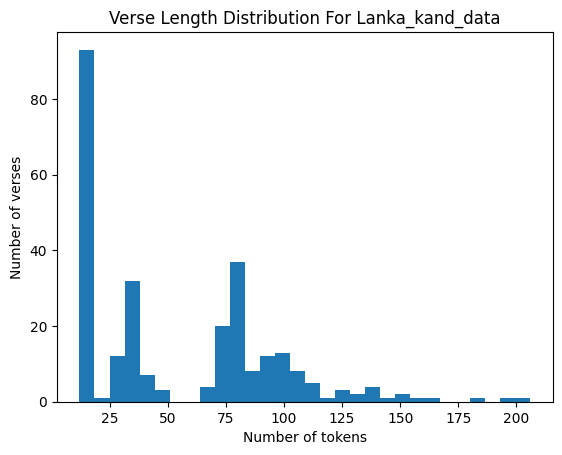

Verse Length Distribution For Uttara_kand_data
Min verse length: 11
Max verse length: 367
Average verse length: 59.129629629629626


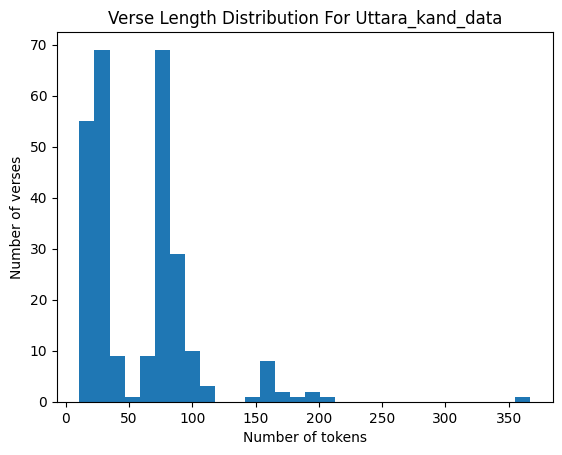

In [ ]:
for i in range(1,8):
    print(f"Verse Length Distribution For {file_names[i]}")
    verse_lengths = [len(line.split(" ")) for line in text_files[i].split("\n")]

    print("Min verse length:", min(verse_lengths))
    print("Max verse length:", max(verse_lengths))
    print("Average verse length:", sum(verse_lengths) / len(verse_lengths))

    plt.hist(verse_lengths, bins=30)
    plt.title(f"Verse Length Distribution For {file_names[i]}")
    plt.xlabel("Number of tokens")
    plt.ylabel("Number of verses")
    plt.show()


## **Phase 4: Representation Learning**

In [3]:
sentences_full = []

for line in text_files[0].split("\n"):
    line = line.strip()
    if line:
        sentences_full.append(line.split())

print("Number of verses:", len(sentences_full))
print("Example verse:", sentences_full[0])

Number of verses: 2247
Example verse: ['वर्णानामर्थसंघानां', 'रसानां', 'छन्दसामपि', 'मङ्गलानां', 'च', 'कर्त्तारौ', 'वन्दे', 'वाणीविनायकौ', 'भवानीशङ्करौ', 'वन्दे', 'श्रद्धाविश्वासरूपिणौ', 'याभ्यां', 'विना', 'न', 'पश्यन्ति', 'सिद्धाःस्वान्तःस्थमीश्वरम्', 'वन्दे', 'बोधमयं', 'नित्यं', 'गुरुं', 'शङ्कररूपिणम्', 'यमाश्रितो', 'हि', 'वक्रोऽपि', 'चन्द्रः', 'सर्वत्र', 'वन्द्यते', 'सीतारामगुणग्रामपुण्यारण्यविहारिणौ', 'वन्दे', 'विशुद्धविज्ञानौ', 'कबीश्वरकपीश्वरौ', 'उद्भवस्थितिसंहारकारिणीं', 'क्लेशहारिणीम्', 'सर्वश्रेयस्करीं', 'सीतां', 'नतोऽहं', 'रामवल्लभाम्', 'यन्मायावशवर्तिं', 'विश्वमखिलं', 'ब्रह्मादिदेवासुरा', 'यत्सत्वादमृषैव', 'भाति', 'सकलं', 'रज्जौ', 'यथाहेर्भ्रमः', 'यत्पादप्लवमेकमेव', 'हि', 'भवाम्भोधेस्तितीर्षावतां', 'वन्देऽहं', 'तमशेषकारणपरं', 'रामाख्यमीशं', 'हरिम्', 'नानापुराणनिगमागमसम्मतं', 'यद्', 'रामायणे', 'निगदितं', 'क्वचिदन्यतोऽपि', 'स्वान्तःसुखाय', 'तुलसी', 'रघुनाथगाथा-', 'भाषानिबन्धमतिमञ्जुलमातनोति']


In [4]:
print(len(sentences_full))
print(sentences_full[0][:10])     # list of WORDS
print(type(sentences_full[0]))    # <class 'list'>
print(type(sentences_full[0][0])) # <class 'str'>


2247
['वर्णानामर्थसंघानां', 'रसानां', 'छन्दसामपि', 'मङ्गलानां', 'च', 'कर्त्तारौ', 'वन्दे', 'वाणीविनायकौ', 'भवानीशङ्करौ', 'वन्दे']
<class 'list'>
<class 'str'>


## **Word2Vec (Baseline model)**

In [ ]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 49.7 MB/s eta 0:00:00


In [5]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(
    sentences = sentences_full,
    vector_size = 100,
    window = 5,
    min_count = 2,
    sg = 1, # skip-gram
    workers = 4,
    epochs = 30
)

In [6]:
w2v_model.save("embeddings/w2v_model.genism")


#### `vector_size=100` → **small corpus stability**
#### `window=5` → **verse-level local context**
#### `min_count=2` → **retain rare poetic words**
#### `sg=1` → **better semantics than CBOW**
#### `epochs=30` → **enough passes for convergence**

## **FastText (subword-aware model)**

In [7]:
from gensim.models import FastText

ft_model = FastText(
    sentences = sentences_full,
    vector_size = 100,
    window = 5,
    min_count = 2,
    sg = 1, # skip-gram
    workers = 4,
    epochs = 30,
    min_n = 3,
    max_n = 6
)

In [8]:
ft_model.save("embeddings/ft_model.genism")


### **Why subword range (3–6)**

- Captures Devanagari morphemes

- Handles compounds + inflections

- Standard for morphologically rich languages

In [ ]:
vocab_w2v = set(w2v_model.wv.index_to_key)
vocab_ft = set(ft_model.wv.index_to_key)

print("Word2Vec vocab size:", len(vocab_w2v))
print("FastText vocab size:", len(vocab_ft))

Word2Vec vocab size: 7550
FastText vocab size: 7550


In [ ]:
# checks if the vector for the given word exists in the model or not?
def can_get_vector(model, word):
    try:
        _ = model.wv[word]
        return True
    except KeyError:
        return False

for w in ["रामभक्ति", "वनवास", "राजधर्म"]:
    print(w,
          "W2V:", can_get_vector(w2v_model, w),
          "FT:", can_get_vector(ft_model, w))


रामभक्ति W2V: False FT: True
वनवास W2V: False FT: True
राजधर्म W2V: False FT: True


**FastText:**

- learns subwords like "राम", "भक्ति", "क्ति"
- reconstructs "रामभक्ति" semantically

**Word2Vec:**

- cannot do this

Although FastText does not include unseen words in its explicit vocabulary, it is able to generate meaningful vector representations for out-of-vocabulary words via subword composition. This behavior is particularly important for morphologically rich and compound-heavy texts such as the ShriRamcharitmanas.

### **Word-level Semantic Analysis for “राम”**

In [ ]:
w2v_model.wv.most_similar("राम", topn=10)

[('भवसागर', 0.5897326469421387),
 ('साथू', 0.5717912316322327),
 ('उरगारि', 0.5602267980575562),
 ('सबनि', 0.5579120516777039),
 ('रघुबीर', 0.5552008152008057),
 ('देखरावा', 0.5447554588317871),
 ('पदारबिंद', 0.5438211560249329),
 ('पुत्रबधू', 0.5421662330627441),
 ('कस्यप', 0.5374660491943359),
 ('चितवा', 0.534875214099884)]

### Word2Vec’s notion of “राम” is situational and narrative, not morphological.

In [ ]:
ft_model.wv.most_similar("राम", topn=10)

[('रामं', 0.742784857749939),
 ('रामायन', 0.685960590839386),
 ('राममय', 0.6848569512367249),
 ('रामू', 0.6743884086608887),
 ('रामघाट', 0.6701518297195435),
 ('रघुवर', 0.6597069501876831),
 ('रामभगत', 0.6356431841850281),
 ('रामु', 0.6237757205963135),
 ('रघुनाथु', 0.6156989336013794),
 ('रघुकुलमनि', 0.6046233177185059)]

### FastText’s notion of “राम” is lexical–morphological, not situational.

### Word2Vec captures Ram’s narrative role through co-occurring actions and companions, while FastText preserves lexical continuity across inflected and compound forms of Ram’s name.

## **Phase 5: Semantic Analysis**

### **5.1 Word-level Semantic Analysis**

#### Comparing Word2vec vs FastText neighbors for:

In [ ]:
texts = ["धर्म","भक्ति","राम","सीता","रावन"]
for word in texts:
    print(w2v_model.wv.most_similar(word,topn = 10))

[('ब्रतधारी', 0.6069375276565552), ('परायन', 0.6039206981658936), ('धर्मसील', 0.6035228371620178), ('गुनातीत', 0.5975096821784973), ('निरत', 0.5954534411430359), ('देखइ', 0.5919879078865051), ('ब्यापहिं', 0.5843012928962708), ('संजम', 0.5754297971725464), ('नेहा', 0.5691154599189758), ('अधर्म', 0.5689972043037415)]
[('दे', 0.754269540309906), ('ये', 0.7510066628456116), ('तरहिं', 0.7266389727592468), ('भूलि', 0.7071170806884766), ('रमानिवास', 0.6986766457557678), ('भजंति', 0.6986137628555298), ('हरिं', 0.6947024464607239), ('गतिं', 0.6923164129257202), ('वदामि', 0.6785103678703308), ('कल्पतरु', 0.6779772639274597)]
[('भवसागर', 0.5897326469421387), ('साथू', 0.5717912316322327), ('उरगारि', 0.5602267980575562), ('सबनि', 0.5579120516777039), ('रघुबीर', 0.5552008152008057), ('देखरावा', 0.5447554588317871), ('पदारबिंद', 0.5438211560249329), ('पुत्रबधू', 0.5421662330627441), ('कस्यप', 0.5374660491943359), ('चितवा', 0.534875214099884)]
[('सभीता', 0.5735262632369995), ('गहरु', 0.520960330963134

In [ ]:
texts = ["धर्म","भक्ति","राम","सीता","रावन"]
for word in texts:
    print(ft_model.wv.most_similar(word,topn = 10))

[('अधर्म', 0.8700867295265198), ('धर्ममय', 0.8690319061279297), ('धर्मरत', 0.8518416881561279), ('धर्मा', 0.8318809866905212), ('धर्मसील', 0.8135353326797485), ('धर्मसीलता', 0.79294353723526), ('चर्म', 0.687042236328125), ('कर्म', 0.6795390844345093), ('परायन', 0.6719362139701843), ('ग्यानवंत', 0.6495876908302307)]
[('भक्त', 0.8818945288658142), ('मुक्ति', 0.8457022309303284), ('आदिसक्ति', 0.8214943408966064), ('भजंति', 0.8105020523071289), ('अमोघसक्ति', 0.8045706748962402), ('सक्ति', 0.7453377842903137), ('नमामहे', 0.7386277914047241), ('तनोतु', 0.7251676321029663), ('भजेऽहं', 0.7181581258773804), ('ये', 0.7063145041465759)]
[('रामं', 0.7477671504020691), ('रामायन', 0.7073702812194824), ('राममय', 0.7001492977142334), ('रामघाट', 0.696196973323822), ('रामू', 0.6911004185676575), ('रघुवर', 0.6596242785453796), ('रामु', 0.6565464735031128), ('रघुनाथु', 0.6394248008728027), ('रघुनंदनहि', 0.6346644759178162), ('रामभगत', 0.6340522766113281)]
[('सीताँ', 0.802143931388855), ('भीता', 0.79092729

### **5.2 Verse-Level Semantic Analysis**

In [ ]:
# Computing Verse Embeddings
# here, each verse has already a list of token so we convert them to vectors and choose one vector by taking the average of all token_vectors
# So, Verse -> semantic point in embedding space

import numpy as np

def verse_embeddings(tokens, model):
    vectors = []
    for w in tokens:
        if w in model.wv:
            vectors.append(model.wv[w])
    if len(vectors) == 0:
        return None
    return np.mean(vectors, axis = 0) # taking mean of all vectors to represent a single vector for the verse

In [ ]:
verse_embeddings_w2v = []
verse_embeddings_ft = []
valid_indices = []

for i, verse in enumerate(sentences_full):
    v_w2v = verse_embeddings(verse, w2v_model)
    v_ft = verse_embeddings(verse,ft_model)

    if v_w2v is not None and v_ft is not None:
        verse_embeddings_w2v.append(v_w2v)
        verse_embeddings_ft.append(v_ft)
        valid_indices.append(i)



In [ ]:
print(f"Number Of Verse: {len(sentences_full)}")
print(f"Valid Verse Embeddings for Word2Vec: {len(verse_embeddings_w2v)}")
print(f"Valid Verse Embeddings for FastText: {len(verse_embeddings_ft)}")

Number Of Verse: 2247
Valid Verse Embeddings for Word2Vec: 2247
Valid Verse Embeddings for FastText: 2247


In [ ]:
print(verse_embeddings_w2v[0].shape)
print(verse_embeddings_ft[0].shape)

(100,)
(100,)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

i, j = 100, 102   # nearby verses
k = 1800        # distant verse

print("Related:", cosine_similarity(
    verse_embeddings_w2v[i].reshape(1,-1),
    verse_embeddings_w2v[j].reshape(1,-1)
)[0][0])

print("Unrelated:", cosine_similarity(
    verse_embeddings_w2v[i].reshape(1,-1),
    verse_embeddings_w2v[k].reshape(1,-1)
)[0][0])


Related: 0.7453045
Unrelated: 0.5659729


### **Intra-Kanda Semantic Cohesion**

In [ ]:
kanda_ranges = [
    ("Bal",0,759),
    ("Ayodhya",760,1423),
    ("Aranya",1424,1521),
    ("Kishkindha",1522,1582),
    ("Sundar",1583,1703),
    ("Lanka",1704,1976),
    ("Uttara",1977,2246)
]

In [ ]:
import random
# take random pairs from the kand and compare them with each other and how they are related to each other for 200 times(samples)
def avg_intra_kanda_similarity(embeddings, start, end, samples = 200):
    sims = []
    indices = list(range(start,end))
    for _ in range(samples):
        i, j = random.sample(indices,2)
        sim = cosine_similarity(
            embeddings[i].reshape(1,-1),
            embeddings[j].reshape(1,-1)
        )[0][0]
        sims.append(sim)
    return sum(sims) / len(sims)

In [ ]:
for name, start, end in kanda_ranges:
    score = avg_intra_kanda_similarity(
        verse_embeddings_w2v,
        start,
        end,
        samples=200
    )
    print(f"{name} (Word2Vec): {score:.4f}")


Bal (Word2Vec): 0.6979
Ayodhya (Word2Vec): 0.7367
Aranya (Word2Vec): 0.7238
Kishkindha (Word2Vec): 0.7222
Sundar (Word2Vec): 0.7414
Lanka (Word2Vec): 0.7378
Uttara (Word2Vec): 0.7420


**Interpretation**

- **Bal & Ayodhya** → slightly lower cohesion
    - Introductory + social narration
    - More thematic diversity

- **Aranya & Kishkindha** → higher cohesion
    - Episodic, but within consistent action contexts
    - Forest, exile, alliance, struggle

- **Sundar Kand** → highest cohesion
    - Single mission (Hanuman ji in Lanka)
    - Tight narrative focus

- **Lanka & Uttara** → stable but slightly broader
    - War (repetition helps cohesion)
    - Reflection + closure (conceptual diversity)

**Key insight (Word2Vec)**

Word2Vec reflects narrative focus: kandas with a single dominant action or goal show higher cohesion.

In [ ]:
for name, start, end in kanda_ranges:
    score = avg_intra_kanda_similarity(
        verse_embeddings_ft,
        start,
        end,
        samples=200
    )
    print(f"{name} (FastText): {score:.4f}")


Bal (FastText): 0.7731
Ayodhya (FastText): 0.7933
Aranya (FastText): 0.8019
Kishkindha (FastText): 0.7977
Sundar (FastText): 0.8007
Lanka (FastText): 0.8104
Uttara (FastText): 0.8066


**Interpretation**

- FastText values are consistently higher
- The ordering is similar to Word2Vec
- Differences between kandas are smoothed

**Key insight (FastText)**

FastText amplifies internal cohesion by preserving lexical and morphological continuity, even when narrative context varies.

### **Boundary Similarity**

In [ ]:
def boundary_similarity(embeddings, end_A, start_B, window=20):
    sims = []
    for i in range(end_A - window, end_A):
        for j in range(start_B, start_B + window): # double loop for 20x20 = 400 comparisons
            sim = cosine_similarity(
                embeddings[i].reshape(1,-1),
                embeddings[j].reshape(1,-1)
            )[0][0]
            sims.append(sim)
    return sum(sims) / len(sims)


- The code compares verses near the end of one kanda with verses near the start of the next kanda, and averages their semantic similarity to measure how strong or weak the narrative transition is.

In [ ]:
for i in range(len(kanda_ranges) - 1):
    name_A, start_A, end_A = kanda_ranges[i]
    name_B, start_B, end_B = kanda_ranges[i + 1]

    score = boundary_similarity(
        verse_embeddings_w2v,
        end_A,
        start_B,
        window=20
    )

    print(f"{name_A} → {name_B} (Word2Vec): {score:.4f}")


Bal → Ayodhya (Word2Vec): 0.7208
Ayodhya → Aranya (Word2Vec): 0.6732
Aranya → Kishkindha (Word2Vec): 0.7198
Kishkindha → Sundar (Word2Vec): 0.7325
Sundar → Lanka (Word2Vec): 0.7379
Lanka → Uttara (Word2Vec): 0.7689


**Interpretation**

- Ayodhya → Aranya is the sharpest drop
    - Palace → exile
    - Social duty → wilderness
    - Dialogue → survival

This is exactly right narratively.

- Later boundaries are smoother
    - Mission continuity (Sundar → Lanka)
    - Resolution phase (Lanka → Uttara)

**Key insight (Word2Vec)**

Word2Vec sharply detects narrative phase transitions driven by changes in setting and action.

In [ ]:
for i in range(len(kanda_ranges) - 1):
    name_A, start_A, end_A = kanda_ranges[i]
    name_B, start_B, end_B = kanda_ranges[i + 1]

    score = boundary_similarity(
        verse_embeddings_ft,
        end_A,
        start_B,
        window=20
    )

    print(f"{name_A} → {name_B} (FastText): {score:.4f}")


Bal → Ayodhya (FastText): 0.7947
Ayodhya → Aranya (FastText): 0.7606
Aranya → Kishkindha (FastText): 0.7989
Kishkindha → Sundar (FastText): 0.8107
Sundar → Lanka (FastText): 0.8129
Lanka → Uttara (FastText): 0.8366


**Interpretation**

- Same relative pattern
- But no dramatic drops
- Even Ayodhya → Aranya is smoother

**Key insight (FastText)**

FastText preserves continuity across boundaries by emphasizing shared lexical and morphological structure, even when narrative context changes.

### **Verse-Level Semantic Cohesion and Narrative Transitions**

#### > Intra-kanda analysis reveals consistently high semantic cohesion across all kandas, validating the verse as an appropriate unit of narrative meaning. Kandas with focused narrative objectives, particularly Sundar Kand, exhibit the highest internal cohesion, while introductory and socially complex kandas show greater semantic diversity.

#### > Boundary similarity analysis highlights Ayodhya to Aranya Kand as the most pronounced semantic transition, corresponding to the narrative shift from royal duty to forest exile. Subsequent boundaries display smoother transitions, reflecting continuity of mission and action-oriented narration.

#### > A comparison of embedding models shows that Word2Vec captures sharper narrative transitions driven by contextual change, whereas FastText produces smoother semantic trajectories by preserving lexical and morphological continuity. Together, these models provide complementary perspectives on narrative progression in a classical, low-resource poetic text.

In [ ]:
# Creating Sentences For all Kandas
sentence_bal = []
sentence_ayodhya = []
sentence_aranya = []
sentence_kishkindha = []
sentence_sundar = []
sentence_lanka = []
sentence_uttara = []

for line in text_files[1].split("\n"):
    line = line.strip()
    if line:
        sentence_bal.append(line.split())

print("Number of verses in Bal_Kand:", len(sentence_bal))
print("Example verse:", sentence_bal[0])

for line in text_files[2].split("\n"):
    line = line.strip()
    if line:
        sentence_ayodhya.append(line.split())

print("Number of verses in Ayodhya_Kand:", len(sentence_ayodhya))
print("Example verse:", sentence_ayodhya[0])

for line in text_files[3].split("\n"):
    line = line.strip()
    if line:
        sentence_aranya.append(line.split())

print("Number of verses in Aranya_Kand:", len(sentence_aranya))
print("Example verse:", sentence_aranya[0])

for line in text_files[4].split("\n"):
    line = line.strip()
    if line:
        sentence_kishkindha.append(line.split())

print("Number of verses in Kishkindha_Kand:", len(sentence_kishkindha))
print("Example verse:", sentence_kishkindha[0])


for line in text_files[5].split("\n"):
    line = line.strip()
    if line:
        sentence_sundar.append(line.split())

print("Number of verses in Sundar_Kand:", len(sentence_sundar))
print("Example verse:", sentence_sundar[0])


for line in text_files[6].split("\n"):
    line = line.strip()
    if line:
        sentence_lanka.append(line.split())

print("Number of verses in Lanka_Kand:", len(sentence_lanka))
print("Example verse:", sentence_lanka[0])


for line in text_files[7].split("\n"):
    line = line.strip()
    if line:
        sentence_uttara.append(line.split())

print("Number of verses in Uttara_Kand:", len(sentence_uttara))
print("Example verse:", sentence_uttara[0])

Number of verses in Bal_Kand: 760
Example verse: ['वर्णानामर्थसंघानां', 'रसानां', 'छन्दसामपि', 'मङ्गलानां', 'च', 'कर्त्तारौ', 'वन्दे', 'वाणीविनायकौ', 'भवानीशङ्करौ', 'वन्दे', 'श्रद्धाविश्वासरूपिणौ', 'याभ्यां', 'विना', 'न', 'पश्यन्ति', 'सिद्धाःस्वान्तःस्थमीश्वरम्', 'वन्दे', 'बोधमयं', 'नित्यं', 'गुरुं', 'शङ्कररूपिणम्', 'यमाश्रितो', 'हि', 'वक्रोऽपि', 'चन्द्रः', 'सर्वत्र', 'वन्द्यते', 'सीतारामगुणग्रामपुण्यारण्यविहारिणौ', 'वन्दे', 'विशुद्धविज्ञानौ', 'कबीश्वरकपीश्वरौ', 'उद्भवस्थितिसंहारकारिणीं', 'क्लेशहारिणीम्', 'सर्वश्रेयस्करीं', 'सीतां', 'नतोऽहं', 'रामवल्लभाम्', 'यन्मायावशवर्तिं', 'विश्वमखिलं', 'ब्रह्मादिदेवासुरा', 'यत्सत्वादमृषैव', 'भाति', 'सकलं', 'रज्जौ', 'यथाहेर्भ्रमः', 'यत्पादप्लवमेकमेव', 'हि', 'भवाम्भोधेस्तितीर्षावतां', 'वन्देऽहं', 'तमशेषकारणपरं', 'रामाख्यमीशं', 'हरिम्', 'नानापुराणनिगमागमसम्मतं', 'यद्', 'रामायणे', 'निगदितं', 'क्वचिदन्यतोऽपि', 'स्वान्तःसुखाय', 'तुलसी', 'रघुनाथगाथा-', 'भाषानिबन्धमतिमञ्जुलमातनोति']
Number of verses in Ayodhya_Kand: 664
Example verse: ['यस्याङ्के', 'च', 'व

### **5.3 Semantic Analysis On Each Kanda**

### **Training Bal_Kand**

In [ ]:
w2v_bal = Word2Vec(sentence_bal, vector_size=100, window=5,
                   min_count=2, sg=1, epochs=30)

ft_bal = FastText(sentence_bal, vector_size=100, window=5,
                  min_count=2, sg=1, epochs=30,
                  min_n=3, max_n=6)

In [ ]:
texts = ["राम","सीता","दशरथः","बिस्वामित्र"]
print("Word2Vec Model")
for word in texts:
  if word in w2v_bal.wv:
    print(f"\n{word}:")
    print(w2v_bal.wv.most_similar(word,topn = 10))
  else:
    print(f"\n{word}: [SKIPPED – not in Word2Vec vocab]")

print("FastText Model")
for word in texts:
  if word in ft_bal.wv:
    print(f"\n{word}:")
    print(ft_bal.wv.most_similar(word,topn = 10))

Word2Vec Model

राम:
[('रघुवर', 0.4980563819408417), ('अगाधा', 0.4959782361984253), ('तरहीं', 0.49543753266334534), ('बरनब', 0.4933670461177826), ('लछिमनु', 0.4925616383552551), ('भजु', 0.4853977560997009), ('रघुनाथ', 0.4831196069717407), ('रघुबर', 0.4820709228515625), ('सिंगारू', 0.47983261942863464), ('सालि', 0.47934645414352417)]

सीता:
[('आई', 0.7265760898590088), ('सभीता', 0.7134252190589905), ('हरषी', 0.6972611546516418), ('अरध', 0.6971527338027954), ('रायँ', 0.6944975852966309), ('धीरजु', 0.6931406855583191), ('कौसल्यादि', 0.6917124390602112), ('करति', 0.6910805106163025), ('गहरु', 0.6850969195365906), ('बढ़ी', 0.6812211275100708)]

दशरथः: [SKIPPED – not in Word2Vec vocab]

बिस्वामित्र:
[('महामुनि', 0.8654133081436157), ('बैठाए', 0.8251964449882507), ('बसहि', 0.8160669207572937), ('रिषिहि', 0.811295747756958), ('नहाने', 0.7920638918876648), ('प्रातक्रिया', 0.7903103828430176), ('रिषिन्ह', 0.7869144082069397), ('बिप्रबृंद', 0.7846376299858093), ('दंडवत', 0.7786520719528198), ('जब

**The Big Idea**
In the Bal Kand (the chapter of beginnings), the AI models focus on where characters come from and their relationships, rather than their power or battles.

**1. Ram: The Son and Devotee**
- Word2Vec (Relationship View): Sees Ram through his family and followers. In this early stage, he isn't a king or a warrior yet; he is defined by his lineage and the people around him.

- FastText (Word-Structure View): Focuses on the name "Ram" itself. It ensures that even when his name changes form (like in complex grammar), the AI still knows it is the same person.

**2. Sita: The Emotional Core**
- Word2Vec (Relationship View): Shows Sita through her feelings and actions. She is portrayed as a real person with emotions and social ties, rather than just a symbolic figure.

- FastText (Word-Structure View): Picks up on the "emotion markers" hidden inside the words. It uses the small parts of words to understand the emotional depth of her character.

**3. Viswamitra: The Holy Teacher**
- Word2Vec (Relationship View): Places him firmly in the world of rituals and forest living. It accurately identifies his "job" in the story as a sage.

- FastText (Word-Structure View): Keeps his identity steady by tracking his long titles and family history through the specific structure of his name.

**Conclusion**
In short, Word2Vec is great at figuring out a character's role by looking at who they hang out with. FastText is great at keeping a character's identity clear by looking at how their name is built, even when the grammar gets complicated.

### **Training Ayodhya_Kand**

In [ ]:
w2v_ayodhya = Word2Vec(sentence_ayodhya, vector_size=100, window=5,
                   min_count=2, sg=1, epochs=30)

ft_ayodhya = FastText(sentence_ayodhya, vector_size=100, window=5,
                  min_count=2, sg=1, epochs=30,
                  min_n=3, max_n=6)

In [ ]:
texts = ["राम", "सीता", "दशरथ", "कैकेयी", "वनवास"]

print("Word2Vec Model")
for word in texts:
    if word in w2v_ayodhya.wv:
        print(f"\n{word}:")
        print(w2v_ayodhya.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in Word2Vec vocab]")

print("\nFastText Model")
for word in texts:
    if word in ft_ayodhya.wv:
        print(f"\n{word}:")
        print(ft_ayodhya.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in FastText vocab]")


Word2Vec Model

राम:
[('लगाए', 0.6506384611129761), ('तेऊ', 0.6180019974708557), ('नेहू', 0.6145334243774414), ('भूपहि', 0.611741304397583), ('पूँछे', 0.5958753824234009), ('सचिवसुत', 0.5950070023536682), ('पुत्रबधू', 0.5943203568458557), ('प्रबेसु', 0.5867236256599426), ('अगोचर', 0.5861207842826843), ('सुंदरताई', 0.585555374622345)]

सीता:
[('मुनिहि', 0.8392429351806641), ('जोहारी', 0.8248590230941772), ('भाइन्ह', 0.8176490068435669), ('मिलहिं', 0.8030276298522949), ('गुरतिय', 0.798267662525177), ('सुंदरताई', 0.7941197752952576), ('बंदे', 0.793097198009491), ('अंक', 0.7891263961791992), ('लवाइ', 0.7845245003700256), ('अनुज', 0.7833576202392578)]

दशरथ: [SKIPPED – not in Word2Vec vocab]

कैकेयी: [SKIPPED – not in Word2Vec vocab]

वनवास: [SKIPPED – not in Word2Vec vocab]

FastText Model

राम:
[('रामू', 0.7690942287445068), ('रामु', 0.7300763726234436), ('रामघाट', 0.7120152115821838), ('राग', 0.7109884023666382), ('रामा', 0.7002100348472595), ('रामसखा', 0.6604236364364624), ('रामहि', 0.6

### In Ayodhya Kand, character meaning is dominated by kingship, duty, relational bonds, and the moral crisis of transition; Word2Vec foregrounds social–political roles and interactions, while FastText stabilizes identity through lexical and emotional morphology.

- Word2Vec encodes Ram primarily as a social and political actor, embedded in courtly interactions, familial relationships, and public duty. Neighbors such as भूपहि, सचिवसुत, पुत्रबधू, and पूँछे indicate Ram’s positioning within royal authority, kinship networks, and decision-driven dialogue rather than spiritual abstraction or combat.

- FastText treats Ram as a stable lexical and relational nucleus, preserving name variants (रामू, रामु, रामा, रामचंद्र) while extending identity through relational compounds (रामसखा, राममातु). This reflects continuity of personal identity even as narrative responsibility intensifies.

- Word2Vec models Sita through social proximity and interpersonal engagement, with neighbors such as मिलहिं, जोहारी, अनुज, अंक, highlighting her role within familial, emotional, and courtly interaction rather than isolation or suffering.

- FastText captures Sita’s emotional and motion-oriented representation through morphology, clustering around inflected and action-linked forms (फेरत, फेरे, फिरे), suggesting affective movement and internal response rather than explicit narrative role change.

- Dasharatha is absent in Word2Vec, reflecting the model’s dependence on frequency and contextual co-occurrence, despite Dasharatha’s narrative importance.

- FastText successfully recovers Dasharatha as a moral and decision-bearing figure, with neighbors such as अरथ, स्वारथ, सावधान, सुखदायक, indicating themes of judgment, consequence, and ethical tension central to his role in Ayodhya Kand.

- Kaikeyi is strongly recovered only in FastText, where her neighborhood (कठोर, कोपभवन, कपटी, मीचु) reflects emotional intensity, manipulation, and rupture. This demonstrates FastText’s ability to encode affective and moral polarity via lexical morphology, even for sparse but pivotal characters.

- Vanavas emerges as a fully conceptual entity only in FastText, clustered around निवासु, निवासी, दिवसु, reflecting exile as a spatial-temporal condition rather than merely a narrative event. Its absence in Word2Vec highlights the model’s difficulty with abstract concepts that lack dense co-occurrence.

**In Ayodhya Kand, per-kanda embeddings reveal a decisive semantic shift from formative identity to ethical responsibility and social obligation. Ram’s semantic neighborhood transitions toward kingship, obedience, and relational duty, while Sita remains embedded in emotional and social proximity. Word2Vec captures this transformation through contextual role change and courtly interaction, whereas FastText preserves identity continuity and emotional structure through morphological stability. Together, these representations expose Ayodhya Kand as the narrative hinge where personal identity yields to moral consequence.**

### **Training Arayna_Kand_data**

In [ ]:
w2v_aranya = Word2Vec(sentence_aranya, vector_size=100, window=5,
                   min_count=2, sg=1, epochs=30)

ft_aranya = FastText(sentence_aranya, vector_size=100, window=5,
                  min_count=2, sg=1, epochs=30,
                  min_n=3, max_n=6)

In [ ]:
texts = ["शूर्पणखा", "खर", "वन", "राक्षस"]

print("Word2Vec Model")
for word in texts:
    if word in w2v_aranya.wv:
        print(f"\n{word}:")
        print(w2v_aranya.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in Word2Vec vocab]")

print("\nFastText Model")
for word in texts:
    if word in ft_aranya.wv:
        print(f"\n{word}:")
        print(ft_aranya.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in FastText vocab]")


Word2Vec Model

शूर्पणखा: [SKIPPED – not in Word2Vec vocab]

खर:
[('दूषन', 0.9663507342338562), ('तिसिरा', 0.916593611240387), ('सुनि', 0.908052921295166), ('मारा', 0.8835964202880859), ('कोउ', 0.8683946132659912), ('धिग', 0.8677776455879211), ('फिरे', 0.8632758259773254), ('सक्ति', 0.8561581373214722), ('कोदंड', 0.8560308814048767), ('गइ', 0.8534058928489685)]

वन: [SKIPPED – not in Word2Vec vocab]

राक्षस: [SKIPPED – not in Word2Vec vocab]

FastText Model

शूर्पणखा:
[('जिमि', 0.5790873765945435), ('देखा', 0.5727272033691406), ('परुष', 0.5672473907470703), ('भाँति', 0.5652050971984863), ('चारी', 0.5650277733802795), ('पुरुष', 0.5637025237083435), ('खल', 0.5595138072967529), ('परा', 0.5584632754325867), ('भइ', 0.557759702205658), ('बिचारी', 0.5567102432250977)]

खर:
[('दूषन', 0.9770960807800293), ('मारा', 0.9316542148590088), ('तिसिरा', 0.9099026918411255), ('धारा', 0.9034116864204407), ('कोउ', 0.8978581428527832), ('पुकारा', 0.889042854309082), ('को', 0.883624255657196), ('तव', 0.8835

### In Aranya Kand, character meaning is dominated by exile, confrontation, and moral polarization; Word2Vec highlights violent narrative interactions, while FastText recovers sparse antagonistic and environmental concepts through morphology.

- Word2Vec encodes conflict through action and opposition, as seen in खर clustering tightly with दूषन, मारा, कोदंड, emphasizing battle, weaponry, and immediate violence rather than abstract identity.

- Key concepts such as शूर्पणखा, वन, and राक्षस are absent in Word2Vec, reflecting its limitation in modeling sparse yet narratively crucial entities during episodic conflict-heavy narration.

- FastText successfully recovers शूर्पणखा as an affectively charged antagonist, with neighbors like परुष, खल, बिचारी, indicating emotional aggression and moral transgression despite low frequency.

- FastText stabilizes conflict identity for खर, reinforcing battle-centric semantics while preserving lexical continuity across inflected forms.

- वन emerges as a fully realized semantic environment only in FastText, clustering with purity, flora, and spatial descriptors (पुनीत, असोक, कुसुम), reflecting exile as a lived ecological condition rather than a mere setting.

- राक्षस is encoded in FastText through action and opposition, linking demonic identity with confrontation and moral contrast, even when explicit co-occurrence is limited.

**In Aranya Kand, per-kanda embeddings expose a decisive shift toward confrontation and moral contrast. Word2Vec captures violence and episodic combat through contextual action patterns, while FastText compensates for sparsity by reconstructing antagonists and environment via morphological structure. Together, these models reveal Aranya Kand as the narrative phase where exile crystallizes into conflict.**

### **Training Kishkindha_kand_data**

In [ ]:
w2v_kishkindha = Word2Vec(sentence_kishkindha, vector_size=100, window=5,
                   min_count=2, sg=1, epochs=30)

ft_kishkindha = FastText(sentence_kishkindha, vector_size=100, window=5,
                  min_count=2, sg=1, epochs=30,
                  min_n=3, max_n=6)

In [ ]:
texts = ["हनुमाना", "सुग्रीव", "वालि", "वानर"]

print("Word2Vec Model")
for word in texts:
    if word in w2v_kishkindha.wv:
        print(f"\n{word}:")
        print(w2v_kishkindha.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in Word2Vec vocab]")

print("\nFastText Model")
for word in texts:
    if word in ft_kishkindha.wv:
        print(f"\n{word}:")
        print(ft_kishkindha.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in FastText vocab]")


Word2Vec Model

हनुमाना:
[('चाप', 0.9945164918899536), ('सींवा', 0.9944139719009399), ('मंदिर', 0.9942586421966553), ('तीरा', 0.9940122365951538), ('सुग्रीवा', 0.9939295053482056), ('परेउ', 0.9939061403274536), ('कपीस', 0.9937677979469299), ('देखहिं', 0.9937557578086853), ('कीन्ही', 0.9937071800231934), ('बिसाला', 0.9934660196304321)]

सुग्रीव:
[('सायक', 0.993404746055603), ('चाप', 0.9932337403297424), ('एकहिं', 0.9930629730224609), ('अवगुन', 0.9928984642028809), ('रघुबीरा', 0.9927380681037903), ('जन', 0.9927145838737488), ('सबहि', 0.9925960898399353), ('कीन्हा', 0.9924365878105164), ('भाँती', 0.9924255609512329), ('पीठि', 0.9923628568649292)]

वालि: [SKIPPED – not in Word2Vec vocab]

वानर: [SKIPPED – not in Word2Vec vocab]

FastText Model

हनुमाना:
[('जाना', 0.9990612268447876), ('कपीस', 0.9990562200546265), ('काना', 0.9989649057388306), ('सुफल', 0.9988622665405273), ('हनुमंत', 0.9988309741020203), ('बिनती', 0.9986599683761597), ('करुना', 0.9986547827720642), ('मंदिर', 0.9986147880554

### In Kishkindha Kand, character meaning is dominated by alliance, action, and collective agency; Word2Vec foregrounds immediate action and partnership, while FastText stabilizes identities of key agents and groups through morphology.

- Word2Vec encodes Hanuman as an action-centric agent, clustering him with spatial and kinetic elements (तीरा, चाप, देखहिं, कीन्ही), emphasizing movement, observation, and execution rather than devotional symbolism.

- Sugriva in Word2Vec is embedded in alliance and conflict context, with neighbors related to weapons, judgment, and shared action (सायक, चाप, अवगुन, रघुबीरा), reflecting his transitional role as ally and claimant.

- Vali and Vanara are absent in Word2Vec, highlighting its limitation in representing entities that are either sparsely mentioned or conceptually collective rather than individually contextualized.

- FastText strongly stabilizes Hanuman’s identity across inflected and honorific forms, while also associating him with virtue and devotion (करुना, कृपानिधाना, बिनती), revealing an early devotional layer beneath his active role.

- Sugriva’s FastText neighborhood preserves relational continuity, linking him to Ram (रघुनाथ) and communicative acts (समुझावा, सुनावा), emphasizing alliance formation and reconciliation.

- Vali is recovered only in FastText as a morally polarized antagonist, with neighbors (रिपु, मारि) reflecting enmity, violence, and ethical tension central to his narrative role.

- Vanara emerges as a coherent collective identity in FastText, clustering around group, service, and duty (जूथ, देव, कर्म, साईं), marking the rise of collective agency in the epic.

**In Kishkindha Kand, per-kanda embeddings reveal a decisive shift from individual conflict to strategic alliance and collective action. Word2Vec captures the immediacy of action and partnership through contextual co-occurrence, while FastText preserves stable identities of key agents and groups through morphological continuity. Together, they characterize Kishkindha Kand as the narrative phase where cooperation replaces isolation and the epic’s collective force is assembled.**

### **Training Sundar_kand_data**

In [ ]:
w2v_sundar = Word2Vec(sentence_sundar, vector_size=100, window=5,
                   min_count=2, sg=1, epochs=30)

ft_sundar = FastText(sentence_sundar, vector_size=100, window=5,
                  min_count=2, sg=1, epochs=30,
                  min_n=3, max_n=6)

In [ ]:
texts = ["हनुमाना", "सीता", "लङ्का", "समुद्र"]

print("Word2Vec Model")
for word in texts:
    if word in w2v_sundar.wv:
        print(f"\n{word}:")
        print(w2v_sundar.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in Word2Vec vocab]")

print("\nFastText Model")
for word in texts:
    if word in ft_sundar.wv:
        print(f"\n{word}:")
        print(ft_sundar.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in FastText vocab]")


Word2Vec Model

हनुमाना:
[('जाना', 0.9334167242050171), ('काजु', 0.9288285970687866), ('बोला', 0.9233841300010681), ('प्रसन्न', 0.9220730662345886), ('देखा', 0.920313835144043), ('सकल', 0.9160417914390564), ('गुन', 0.9127044081687927), ('बिसेषा', 0.9122022986412048), ('मुख', 0.9120169281959534), ('बिसेषी', 0.9109779596328735)]

सीता:
[('बिरहाकुल', 0.9677961468696594), ('मो', 0.9648731350898743), ('निदाना', 0.9648188948631287), ('प्रभुहि', 0.9641221761703491), ('होति', 0.9622986912727356), ('करहि', 0.9616560339927673), ('सुमुखि', 0.9611908793449402), ('करु', 0.9608660936355591), ('बाग', 0.9607378244400024), ('सीतल', 0.9605046510696411)]

लङ्का: [SKIPPED – not in Word2Vec vocab]

समुद्र: [SKIPPED – not in Word2Vec vocab]

FastText Model

हनुमाना:
[('हनुमान', 0.9874507188796997), ('काना', 0.9873555898666382), ('भगवाना', 0.9836779832839966), ('समाना', 0.9799906611442566), ('पयाना', 0.9788921475410461), ('बलवाना', 0.9782432913780212), ('सकल', 0.9688534140586853), ('जाना', 0.9670446515083313

### **Training Lanka_kand_data**

In [ ]:
w2v_lanka = Word2Vec(sentence_lanka, vector_size=100, window=5,
                   min_count=2, sg=1, epochs=30)

ft_lanka = FastText(sentence_lanka, vector_size=100, window=5,
                  min_count=2, sg=1, epochs=30,
                  min_n=3, max_n=6)

In [ ]:
texts = ["रावन", "युद्ध", "सेतु", "ब्रह्मांड"]
print("Word2Vec Model")
for word in texts:
    if word in w2v_lanka.wv:
        print(f"\n{word}:")
        print(w2v_lanka.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in Word2Vec vocab]")

print("\nFastText Model")
for word in texts:
    if word in ft_lanka.wv:
        print(f"\n{word}:")
        print(ft_lanka.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in FastText vocab]")


Word2Vec Model

रावन:
[('लघु', 0.7358115911483765), ('सरिस', 0.7299623489379883), ('कैसें', 0.7282388210296631), ('कहै', 0.728238046169281), ('महा', 0.7261049151420593), ('बालिसुत', 0.7192860841751099), ('जागा', 0.7120434641838074), ('मूढ़', 0.7114361524581909), ('जनावा', 0.7079618573188782), ('कतहुँ', 0.7074047327041626)]

युद्ध: [SKIPPED – not in Word2Vec vocab]

सेतु:
[('लोक', 0.8878833055496216), ('बाँधा', 0.8718845844268799), ('भजेहु', 0.8454451560974121), ('प्रीती', 0.8434426784515381), ('मतिमंद', 0.8411679863929749), ('एहिं', 0.8352029323577881), ('लेहीं', 0.8330168128013611), ('आसीन', 0.8303873538970947), ('नागर', 0.8284233808517456), ('भगत', 0.8229238986968994)]

ब्रह्मांड:
[('हीन', 0.9596620202064514), ('पावहीं', 0.9592218995094299), ('जानहु', 0.9575707912445068), ('ग्रसन', 0.9509292840957642), ('बिराज', 0.9479096531867981), ('जीहा', 0.9427286982536316), ('लंगूर', 0.940983235836029), ('काटत', 0.9385734796524048), ('बिदारी', 0.937809407711029), ('प्रति', 0.937283456325531)]

F

### In Sundar Kand, character meaning is dominated by mission execution, emotional intensity, and devotional resolve; Word2Vec foregrounds purposeful action and emotional states, while FastText stabilizes heroic and affective identity through morphology.

- Word2Vec encodes Hanuman as a purposeful agent of action, clustering him with task-oriented and communicative verbs (जाना, काजु, बोला, देखा), reflecting his role as the executor of a single, focused mission rather than a symbolic figure.

- FastText stabilizes Hanuman’s heroic–devotional identity, preserving inflected and honorific forms (हनुमान, भगवाना, बलवाना), reinforcing strength, devotion, and unwavering resolve.

- Word2Vec models Sita through intense emotional and relational states, with neighbors such as बिरहाकुल, प्रभुहि, सीतल, highlighting separation, hope, and inner endurance rather than physical action.

- FastText compresses Sita’s emotional suffering into a stable affective cluster, unifying sorrow, purity, and longing (बिरह, बिरहाकुल, सीतल) through morphological continuity.

- Lanka and Samudra are absent in Word2Vec, underscoring its limitation in capturing large symbolic or environmental entities when they function more as narrative backdrops than active agents.

- FastText reconstructs Lanka and Samudra as symbolic–psychological spaces, associating Lanka with fear, force, and confrontation (त्रास, हठि, मारि), and Samudra with magnitude and transcendence (अतिसय, त्रिबिध, गरुड़), emphasizing the epic scale of the mission.

**In Sundar Kand, per-kanda embeddings reveal a narrative phase of concentrated purpose and emotional depth. Word2Vec captures the immediacy of action and inner states that drive the mission forward, while FastText preserves heroic identity and symbolic space through morphological structure. Together, they characterize Sundar Kand as the epic’s most focused and emotionally charged narrative segment.**

### **Trainig Uttara_kand_data**

In [ ]:
w2v_uttara = Word2Vec(sentence_uttara, vector_size=100, window=5,
                   min_count=2, sg=1, epochs=30)

ft_uttara = FastText(sentence_uttara, vector_size=100, window=5,
                  min_count=2, sg=1, epochs=30,
                  min_n=3, max_n=6)

In [ ]:
texts = ["धर्म", "राज्य", "त्याग", "सीता", "लव", "कुश"]
print("Word2Vec Model")
for word in texts:
    if word in w2v_uttara.wv:
        print(f"\n{word}:")
        print(w2v_uttara.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in Word2Vec vocab]")

print("\nFastText Model")
for word in texts:
    if word in ft_uttara.wv:
        print(f"\n{word}:")
        print(ft_uttara.wv.most_similar(word, topn=10))
    else:
        print(f"\n{word}: [SKIPPED – not in FastText vocab]")


Word2Vec Model

धर्म:
[('भोग', 0.7622281908988953), ('धुरंधर', 0.7565913200378418), ('तामस', 0.7515456080436707), ('नियम', 0.7373156547546387), ('दया', 0.7304520010948181), ('दम', 0.7277810573577881), ('द्वापर', 0.7240056395530701), ('धर्मसील', 0.7154118418693542), ('सीतलता', 0.7111940979957581), ('अधर्म', 0.7037543058395386)]

राज्य: [SKIPPED – not in Word2Vec vocab]

त्याग: [SKIPPED – not in Word2Vec vocab]

सीता:
[('आवत', 0.899910032749176), ('जननीं', 0.8923359513282776), ('परमानंद', 0.8910915851593018), ('चढ़ी', 0.8898335695266724), ('सुग्रीव', 0.886817216873169), ('पवनसुत', 0.8852638602256775), ('हियँ', 0.877590000629425), ('सत्रुहन', 0.8765670657157898), ('रुख', 0.8751255869865417), ('अटारिन्ह', 0.8732626438140869)]

लव: [SKIPPED – not in Word2Vec vocab]

कुश: [SKIPPED – not in Word2Vec vocab]

FastText Model

धर्म:
[('धर्मा', 0.9423344135284424), ('अधर्म', 0.9408558011054993), ('धर्मरत', 0.9243886470794678), ('धर्मसील', 0.9027332663536072), ('चर्म', 0.8763554692268372), ('धरम', 

### In Uttara Kand, character meaning is dominated by ethical reflection, renunciation, and cosmic order; Word2Vec foregrounds moral discourse and consequence, while FastText stabilizes abstract concepts and late-emerging characters through morphology.

- Word2Vec models धर्म as an ethical balancing force, clustering it with नियम, दया, दम, अधर्म, indicating moral tension, restraint, and reflection rather than action or governance.

- FastText stabilizes धर्म as an abstract philosophical construct, preserving its lexical family (धर्मा, धर्मरत, धर्मसील) while linking it to कर्म and भोग, reinforcing post-conflict moral synthesis.

- राज्य and त्याग are absent in Word2Vec, reflecting its difficulty in representing abstract, reflective concepts that appear in evaluative rather than action-driven contexts.

- FastText reconstructs राज्य as a cosmic and idealized order, associating it with transcendence and completeness (बैकुंठ, दिब्य, अखंडा), rather than political administration.

- FastText encodes त्याग as conscious renunciation, clustering it with moral discernment and restraint (त्यागि, धीर, ईस्वर), marking a shift from heroic action to ethical resolution.

- Word2Vec models Sita through relational return and emotional culmination, with neighbors like जननीं, परमानंद, हियँ, emphasizing reunion and inner closure rather than conflict.

- FastText elevates Sita into a symbolic and sovereign presence, associating her with सिंघासन, सिखर, परमानंद, reflecting moral dignity and transcendence.

- Lav and Kush are absent in Word2Vec, highlighting its dependence on narrative frequency.

- FastText recovers Lav and Kush as morally charged identities, linking them to suffering, virtue, and destiny, emphasizing lineage continuation and ethical inheritance.

**In Uttara Kand, per-kanda embeddings reveal a narrative phase of reflection and moral consolidation. Word2Vec captures ethical discourse through contextual association, while FastText preserves abstract values, lineage, and transcendental resolution through morphological continuity. Together, they characterize Uttara Kand as the epic’s closing movement from narrative action to moral meaning.**

## **Phase 6: Turning this Project into a Tool**

### **Preparing the data**

In [ ]:
with open("kanda_indices.json", "w") as f:
    json.dump(kanda_ranges, f, indent=2)

In [ ]:
verse_to_kanda = {}
for kanda, start, end in kanda_ranges:
  for i in range(start,end+1):
    verse_to_kanda[i] = kanda

In [ ]:
import json

verse_metadata = []

for idx,verse in enumerate(sentences_full):
  verse_metadata.append({
      "id":idx,
      "kanda":verse_to_kanda[idx],
      "text":verse
  })

In [ ]:
with open("verses_metadata.json", "w", encoding="utf-8") as f:
    json.dump(
        verse_metadata,
        f,
        ensure_ascii=False,
        indent=2
    )


In [ ]:
with open("verses_metadata.json", encoding="utf-8") as f:
    data = json.load(f)

print(len(data))                # should be 2247
print(data[0])
print(data[-1])


2247
{'id': 0, 'kanda': 'Bal', 'text': ['वर्णानामर्थसंघानां', 'रसानां', 'छन्दसामपि', 'मङ्गलानां', 'च', 'कर्त्तारौ', 'वन्दे', 'वाणीविनायकौ', 'भवानीशङ्करौ', 'वन्दे', 'श्रद्धाविश्वासरूपिणौ', 'याभ्यां', 'विना', 'न', 'पश्यन्ति', 'सिद्धाःस्वान्तःस्थमीश्वरम्', 'वन्दे', 'बोधमयं', 'नित्यं', 'गुरुं', 'शङ्कररूपिणम्', 'यमाश्रितो', 'हि', 'वक्रोऽपि', 'चन्द्रः', 'सर्वत्र', 'वन्द्यते', 'सीतारामगुणग्रामपुण्यारण्यविहारिणौ', 'वन्दे', 'विशुद्धविज्ञानौ', 'कबीश्वरकपीश्वरौ', 'उद्भवस्थितिसंहारकारिणीं', 'क्लेशहारिणीम्', 'सर्वश्रेयस्करीं', 'सीतां', 'नतोऽहं', 'रामवल्लभाम्', 'यन्मायावशवर्तिं', 'विश्वमखिलं', 'ब्रह्मादिदेवासुरा', 'यत्सत्वादमृषैव', 'भाति', 'सकलं', 'रज्जौ', 'यथाहेर्भ्रमः', 'यत्पादप्लवमेकमेव', 'हि', 'भवाम्भोधेस्तितीर्षावतां', 'वन्देऽहं', 'तमशेषकारणपरं', 'रामाख्यमीशं', 'हरिम्', 'नानापुराणनिगमागमसम्मतं', 'यद्', 'रामायणे', 'निगदितं', 'क्वचिदन्यतोऽपि', 'स्वान्तःसुखाय', 'तुलसी', 'रघुनाथगाथा-', 'भाषानिबन्धमतिमञ्जुलमातनोति']}
{'id': 2246, 'kanda': 'Uttara', 'text': ['मैं', 'कृतकृत्य', 'भइउँ', 'अब', 'तव', 'प्

In [ ]:
import numpy as np

embeddings_ft = np.vstack(verse_embeddings_ft)
print(embeddings_ft.shape)


(2247, 100)


In [ ]:
np.save("verse_embeddings_ft.npy", embeddings_ft)

In [ ]:
concepts = [
    "राम", "सीता", "हनुमान", "धर्म", "त्याग",
    "वनवास", "युद्ध", "भक्ति"
]

with open("concepts.json", "w", encoding="utf-8") as f:
    json.dump(concepts, f, ensure_ascii=False, indent=2)


### **Core Semantic Retrieval Engine**

In [ ]:
embeddings = np.load("verse_embeddings_ft.npy")

with open("verses_metadata.json",encoding = 'utf-8') as f:
  verses  = json.load(f)

with open("kanda_indices.json") as f:
  kanda_indices = json.load(f)

print(embeddings.shape, len(verses))

(2247, 100) 2247


In [ ]:
from numpy.linalg import norm
def cosine_sim(a,b):
  return np.dot(a,b)/(norm(a) * norm(b))

### **Verse → Similar Verses**

In [ ]:
# this function returns the  highly related verses for a given verse

def get_similar_verses(verse_id, top_k = 5, kanda_filter = None):
  query_vec = embeddings[verse_id] # pick the embedding vector for the given query_vector
  sims = []

  for i, vec in enumerate(embeddings): # compare the query_vector with all other vectors in the embedding
    if i == verse_id: # skip the vectors if it is equal to the given query_vector to avoid comparing with itself
      continue

    if kanda_filter: # if a kanda given specifically then Only compare verses inside that kanda
      if verses[i]["kanda"] != kanda_filter:
        continue

    sim = cosine_sim(query_vec, vec)
    sims.append((i,sim))

  sims.sort(key = lambda x: x[1], reverse = True)
  return sims[: top_k]

>This function treats every verse as a point in a semantic space and measures how close all other verses are to it. By comparing cosine similarity between vectors, it retrieves verses that express similar meaning, emotion, or narrative role. Optional kanda filtering allows the function to distinguish between local reinforcement (within the same narrative phase) and long-range semantic echoes (across kandas), making it suitable for both close reading and narrative-level exploration.

In [ ]:
results = get_similar_verses(100, top_k=5,kanda_filter = "Aranya")
for idx, score in results:
    print(score, verses[idx]["kanda"], verses[idx]["text"][:60])


0.8588253 Aranya ['सुनि', 'रघुपति', 'के', 'बचन', 'सुहाए', 'मुनि', 'तन', 'पुलक', 'नयन', 'भरि', 'आए', 'कहहु', 'कवन', 'प्रभु', 'कै', 'असि', 'रीती', 'सेवक', 'पर', 'ममता', 'अरु', 'प्रीती', 'जे', 'न', 'भजहिं', 'अस', 'प्रभु', 'भ्रम', 'त्यागी', 'ग्यान', 'रंक', 'नर', 'मंद', 'अभागी', 'पुनि', 'सादर', 'बोले', 'मुनि', 'नारद', 'सुनहु', 'राम', 'बिग्यान', 'बिसारद', 'संतन्ह', 'के', 'लच्छन', 'रघुबीरा', 'कहहु', 'नाथ', 'भव', 'भंजन', 'भीरा', 'सुनु', 'मुनि', 'संतन्ह', 'के', 'गुन', 'कहऊँ', 'जिन्ह', 'ते']
0.858126 Aranya ['तब', 'रघुबीर', 'कहा', 'मुनि', 'पाहीं', 'तुम्ह', 'सन', 'प्रभु', 'दुराव', 'कछु', 'नाही', 'तुम्ह', 'जानहु', 'जेहि', 'कारन', 'आयउँ', 'ताते', 'तात', 'न', 'कहि', 'समुझायउँ', 'अब', 'सो', 'मंत्र', 'देहु', 'प्रभु', 'मोही', 'जेहि', 'प्रकार', 'मारौं', 'मुनिद्रोही', 'मुनि', 'मुसकाने', 'सुनि', 'प्रभु', 'बानी', 'पूछेहु', 'नाथ', 'मोहि', 'का', 'जानी', 'तुम्हरेइँ', 'भजन', 'प्रभाव', 'अघारी', 'जानउँ', 'महिमा', 'कछुक', 'तुम्हारी', 'ऊमरि', 'तरु', 'बिसाल', 'तव', 'माया', 'फल', 'ब्रह्मांड', 'अनेक', 'निकाया', 'जीव'

>This verse is semantically related to others in Aranya Kand that express the philosophical and emotional aftermath of separation, where grief gives rise to reflections on dharma, bhakti, and divine purpose.




### **Concept → Verses**

In [ ]:
def get_concept_vector(word,model):
  if word in model.wv:
    return model.wv[word]
  else:
    return None


In [ ]:
def search_by_concept(word, model, top_k = 5,kanda_filter = None):
  concept_vec = get_concept_vector(word, model)
  if concept_vec is None:
    return []

  sims = []

  for i, vec in enumerate(embeddings):
    if kanda_filter:
      if verses[i]["kanda"]!= kanda_filter:
        continue

    sim = cosine_sim(concept_vec,vec)
    sims.append((i,sim))

  sims.sort(key=lambda x: x[1], reverse = True)
  return sims[:top_k]

>Concept-based retrieval identifies verses whose semantic representations align closely with an abstract idea, enabling exploration of how themes manifest across narrative phases.

In [ ]:
results = search_by_concept("त्याग", ft_model, top_k=5)

for idx, score in results:
    print(score, verses[idx]["kanda"], verses[idx]["text"][:60])


0.6447594 Ayodhya ['सोचिअ', 'गृही', 'जो', 'मोह', 'बस', 'करइ', 'करम', 'पथ', 'त्याग', 'सोचिअ', 'जति', 'प्रंपच', 'रत', 'बिगत', 'बिबेक', 'बिराग']
0.62942135 Uttara ['मम', 'गुन', 'ग्राम', 'नाम', 'रत', 'गत', 'ममता', 'मद', 'मोह', 'ता', 'कर', 'सुख', 'सोइ', 'जानइ', 'परानंद', 'संदोह']
0.6255817 Uttara ['सुनु', 'खगेस', 'कलि', 'कपट', 'हठ', 'दंभ', 'द्वेष', 'पाषंड', 'मान', 'मोह', 'मारादि', 'मद', 'ब्यापि', 'रहे', 'ब्रह्मंड', 'तामस', 'धर्म', 'करहिं', 'नर', 'जप', 'तप', 'ब्रत', 'मख', 'दान', 'देव', 'न', 'बरषहिं', 'धरनीं', 'बए', 'न', 'जामहिं', 'धान']
0.6232061 Uttara ['एहि', 'तन', 'कर', 'फल', 'बिषय', 'न', 'भाई', 'स्वर्गउ', 'स्वल्प', 'अंत', 'दुखदाई', 'नर', 'तनु', 'पाइ', 'बिषयँ', 'मन', 'देहीं', 'पलटि', 'सुधा', 'ते', 'सठ', 'बिष', 'लेहीं', 'ताहि', 'कबहुँ', 'भल', 'कहइ', 'न', 'कोई', 'गुंजा', 'ग्रहइ', 'परस', 'मनि', 'खोई', 'आकर', 'चारि', 'लच्छ', 'चौरासी', 'जोनि', 'भ्रमत', 'यह', 'जिव', 'अबिनासी', 'फिरत', 'सदा', 'माया', 'कर', 'प्रेरा', 'काल', 'कर्म', 'सुभाव', 'गुन', 'घेरा', 'कबहुँक', 'करि', 'करुना', 'नर', 'देही', '

>These verses are retrieved because they strongly express themes of renunciation, detachment from desire, and moral reflection. While some verses explicitly mention त्याग, others convey the concept through discussions of karma, maya, and liberation, especially in the epic’s concluding phases.

In [ ]:
results = search_by_concept("त्याग", ft_model, top_k=5,kanda_filter = "Aranya")

for idx, score in results:
    print(score, verses[idx]["kanda"], verses[idx]["text"][:60])


0.61202013 Aranya ['कलिमल', 'समन', 'दमन', 'मन', 'राम', 'सुजस', 'सुखमूल', 'सादर', 'सुनहि', 'जे', 'तिन्ह', 'पर', 'राम', 'रहहिं', 'अनुकूल', 'कठिन', 'काल', 'मल', 'कोस', 'धर्म', 'न', 'ग्यान', 'न', 'जोग', 'जप', 'परिहरि', 'सकल', 'भरोस', 'रामहि', 'भजहिं', 'ते', 'चतुर', 'नर']
0.6103312 Aranya ['नमामि', 'भक्त', 'वत्सलं', 'कृपालु', 'शील', 'कोमलं', 'भजामि', 'ते', 'पदांबुजं', 'अकामिनां', 'स्वधामदं', 'निकाम', 'श्याम', 'सुंदरं', 'भवाम्बुनाथ', 'मंदरं', 'प्रफुल्ल', 'कंज', 'लोचनं', 'मदादि', 'दोष', 'मोचनं', 'प्रलंब', 'बाहु', 'विक्रमं', 'प्रभोऽप्रमेय', 'वैभवं', 'निषंग', 'चाप', 'सायकं', 'धरं', 'त्रिलोक', 'नायकं', 'दिनेश', 'वंश', 'मंडनं', 'महेश', 'चाप', 'खंडनं', 'मुनींद्र', 'संत', 'रंजनं', 'सुरारि', 'वृंद', 'भंजनं', 'मनोज', 'वैरि', 'वंदितं', 'अजादि', 'देव', 'सेवितं', 'विशुद्ध', 'बोध', 'विग्रहं', 'समस्त', 'दूषणापहं', 'नमामि', 'इंदिरा', 'पतिं', 'सुखाकरं']
0.60742277 Aranya ['सुनि', 'मुनि', 'कह', 'पुरान', 'श्रुति', 'संता', 'मोह', 'बिपिन', 'कहुँ', 'नारि', 'बसंता', 'जप', 'तप', 'नेम', 'जलाश्रय', 'झारी', 'होइ', 'ग

>In Aranya Kand, tyāga is expressed through surrender and lived discipline rather than philosophical abstraction.

In [ ]:
def explain_concept_result(concept, result_id):
    kanda = verses[result_id]["kanda"]

    if kanda == "Uttara":
        return f"This verse reflects on {concept} philosophically in the epic’s concluding phase."

    if kanda == "Ayodhya":
        return f"This verse presents {concept} as moral duty within social order."

    if kanda == "Aranya":
        return f"This verse expresses {concept} through lived detachment and ascetic context."

    return f"This verse provides contextual grounding for the concept of {concept}."


In [ ]:
results = search_by_concept("धर्म", ft_model, top_k=5, kanda_filter="Uttara")

for idx, score in results:
    explanation = explain_concept_result("धर्म", idx)
    print(round(score,3), verses[idx]["kanda"],verses[idx]["text"][:60], explanation)


0.71 Uttara ['नित', 'जुग', 'धर्म', 'होहिं', 'सब', 'केरे', 'हृदयँ', 'राम', 'माया', 'के', 'प्रेरे', 'सुद्ध', 'सत्व', 'समता', 'बिग्याना', 'कृत', 'प्रभाव', 'प्रसन्न', 'मन', 'जाना', 'सत्व', 'बहुत', 'रज', 'कछु', 'रति', 'कर्मा', 'सब', 'बिधि', 'सुख', 'त्रेता', 'कर', 'धर्मा', 'बहु', 'रज', 'स्वल्प', 'सत्व', 'कछु', 'तामस', 'द्वापर', 'धर्म', 'हरष', 'भय', 'मानस', 'तामस', 'बहुत', 'रजोगुन', 'थोरा', 'कलि', 'प्रभाव', 'बिरोध', 'चहुँ', 'ओरा', 'बुध', 'जुग', 'धर्म', 'जानि', 'मन', 'माहीं', 'तजि', 'अधर्म'] This verse reflects on धर्म philosophically in the epic’s concluding phase.
0.666 Uttara ['एक', 'ब्याधि', 'बस', 'नर', 'मरहिं', 'ए', 'असाधि', 'बहु', 'ब्याधि', 'पीड़हिं', 'संतत', 'जीव', 'कहुँ', 'सो', 'किमि', 'लहै', 'समाधि', 'नेम', 'धर्म', 'आचार', 'तप', 'ग्यान', 'जग्य', 'जप', 'दान', 'भेषज', 'पुनि', 'कोटिन्ह', 'नहिं', 'रोग', 'जाहिं', 'हरिजान'] This verse reflects on धर्म philosophically in the epic’s concluding phase.
0.659 Uttara ['-तब', 'मैं', 'हृदयँ', 'बिचारा', 'जोग', 'जग्य', 'ब्रत', 'दान', 'जा', 'कहुँ', 'क